In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv("D:\\data\\creditcard.csv")

In [4]:
train_data, test_data=train_test_split(data, test_size=0.3)
X_train = train_data.drop(['Time', 'Class'], axis=1)
y_train = train_data['Class']
X_test = test_data.drop(['Time', 'Class'], axis=1)
y_test=test_data['Class']
pos_weight=np.arange(0.05,1,0.1)
neg_weight=1-pos_weight

In [6]:
model_list=[]
f1_list=[]
auc_list=[]

In [7]:
    for i in np.arange(0,10,1):
        model_list.append(LogisticRegression(class_weight={0:neg_weight[i],1:pos_weight[i]},solver='liblinear').fit(X_train,y_train))
        f1_list.append(f1_score(y_test,model_list[i].predict(X_test)))
        auc_list.append(roc_auc_score(y_test,model_list[i].predict(X_test)))

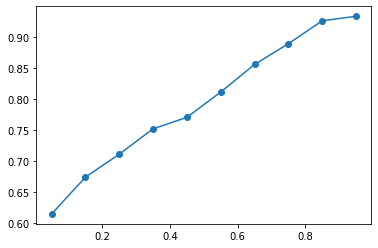

In [8]:
    plt.plot(pos_weight,auc_list,marker='o')

In [9]:
auc_list

[0.6148030925847777,
 0.6740330462689444,
 0.7110524999609259,
 0.751787379586648,
 0.7703000369901482,
 0.8110290555008517,
 0.8554500554852222,
 0.8887540832434628,
 0.9257676758204259,
 0.9330344164673887]

In [10]:
f1_list

[0.36904761904761907,
 0.4973544973544974,
 0.5643564356435643,
 0.6355140186915887,
 0.6636363636363636,
 0.7210300429184548,
 0.7710843373493975,
 0.7984790874524715,
 0.8303249097472925,
 0.7722772277227722]

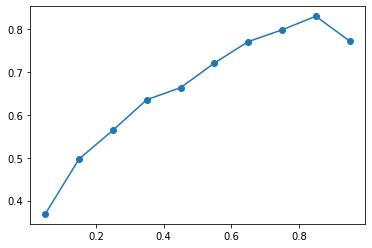

In [11]:
plt.plot(pos_weight,f1_list,marker='o')